In [ ]:
# Commits to GitHub
# Save and add a message before committing

In [ ]:
%%bash 
cd /Users/asianzhang/Documents/GitHub/machine-learning-tone-generation
git add .
git commit --allow-empty-message -m "Organized files"
git push

# Exercises
---
# Chapter 1
___
## Sigmoid neurons
---
### Sigmoid neurons simulating perceptrons, part I
Given that $z=w\cdot x+b$, only $\mbox{sgn}(z)$ affects the output of the perceptron. If $w$ and $b$ are multiplied by $c>0$, then $z=(cw)\cdot x+ (cb)=c(w\cdot x+b$). Since the multiplication of a number by a positive constant does not change the $ \mbox{sgn}()$ of the number, the multiplication by $c$ will not affect the output of the perceptron.
### Sigmoid neurons simulating perceptrons, part II 
As established in part I, multiplication of $w$ and $b$ by a constant $c>0$ will cause $z$ to be multiplied by the constant $c$. So, as $c\to\infty$, $|z|\to\infty$, and $\lim\limits_{z\to-\infty}\sigma(z)=0$ and $\lim\limits_{z\to\infty}\sigma(z)=1$. Since the output is either 0 or 1, this behavior models a perceptron. However, if $w\cdot x+b = z = 0$, then $\lim\limits_{c\to\infty}cz=0$, and $\sigma(z=0)=0.5$, which is not possible with a perceptron.


## A simple network to classify handwritten digits
---
### Designing an output layer for bitwise representation of prediction
$$ 
Weights = \left[ {\begin{array}{cccccccccc} 
            0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 99 & 99\\
            0 & 0 & 0 & 0 & 99 & 99 & 99 & 99 & 0 & 0\\
            0 & 0 & 99 & 99 & 0 & 0 & 99 & 99 & 0 & 0\\
            0 & 99 & 0 & 99 & 0 & 99 & 0 & 99 & 0 & 99\\
            \end{array} } \right],\ 
Biases = \left[ {\begin{array}{c}
            0\\
            0\\
            0\\
            0\\
            \end{array} } \right]
$$


## Learning with gradient descent
---
### Prove the following assertion:
Assertion: The choice of $\Delta v$ which minimizes $\nabla C \cdot \Delta v  \approx \Delta C$ is $\Delta v = -\eta \nabla C$ (where $\eta = \epsilon / \|\nabla C\|$ is determined by the size constraint $\|\Delta v\| = \epsilon$, for some small fixed $\epsilon>0$).

According to the Cauchy-Schwarz inequality, $|\nabla C \cdot \Delta v| \leq \|\nabla C \|\
\|\Delta v\|$. Since there is a constraint $\|\Delta v\|=\epsilon$, $|\nabla C \cdot \Delta v| \leq \epsilon\|\nabla C \|$. Since $\nabla C$ and $\epsilon$ are constant, $\epsilon\|\nabla C \|$ is also constant. Also, since the absolute value is used in the inequality, the minimum for $\nabla C \cdot \Delta v$ will be negative, leading to $\nabla C\cdot\Delta v \geq -\epsilon\|\nabla C\|$. Therefore, $\mbox{min}(\nabla C\cdot\Delta v) = \epsilon\|\nabla C\|$. $\Delta v = -\eta\nabla C$ satisfies this equation, and is thus the minimum of $\nabla C \cdot\Delta v$. 

($\nabla C \cdot\Delta v=\nabla C\cdot(-\eta\nabla C)=-\eta(\nabla C\cdot\nabla C)=-\eta\|\nabla C\|^2=-\frac{\epsilon}{\|\nabla C\|}\|\nabla C\|^2=-\epsilon\|\nabla C\|$)
### Gradient descent when $C$ is a function of just one variable
In this case, $C$ is one-half of the squared residual between the output of a function and the expected value of the function (for confimation, see equation 6). Minimizing C leads to a smaller residual, optimizing the the function to output the desired value with the given input. The geometric interpretation is similar, with a "ball" ($C$) going down towards the lowest point of a hill where error is minimized.
### Naming one advantage and one disadvantage of minibatch size of 1 (online learning) compared to a size of 20 in stochastic gradient descent
Advantage: Less storage, i.e. no need to store $\nabla C$ during a minibatch  
Disadvantage: Learning may be erratic, ex. outliers will have a very high cost, leading to training in a potentially wrong direction


## Implementing our network to classify digits
---
### Verifying the use of matrices with component form
Given $a' = \sigma(wa+b)$:  
Since $w$ and $a$ are matrices, using the definition of matrix multiplication,
$a_j = \sigma((\sum_k w_{jk} a_k) + b_j)$, which is consistent with the rule for computing the output of a sigmoid neuron.
### Creating a network with just two layers
Max classification accuracy: 91.88%
# Chapter 2
---
## Proof of the four fundamental equations
---
### Proving equations BP3 and BP4
BP3: $\frac{\partial C}{\partial b^l_j}=\delta^l_j$  
Proof: $\frac{\partial C}{\partial b^l_j} = \frac{\partial C}{\partial z^l_j}\frac{\partial z^l_j}{\partial b^l_j}=\delta^1_j(1)=\delta^1_j$

BP4: $\frac{\partial C}{\partial w^l_{jk}}=a^{l-1}_k\delta^l_j$  
Proof: $\frac{\partial C}{\partial w^l_{jk}}=\frac{\partial C}{\partial z^l_j}\frac{\partial z^l_j}{\partial w^l_{jk}}=\delta^l_ja^{l-1}_k=a^{l-1}_k\delta^l_j$
## The backpropagation algorithm
---
### Backpropagation with a single modified neuron
Change BP2 so that $\delta^l=((w^{l+1})^T\delta^{l+1})\odot f'(z^l)$ instead of $((w^{l+1})^T\delta^{l+1})\odot \sigma'(z^l)$
### Backpropagation with linear neurons
Replace all $\sigma'(z^l)$ in the backpropagation algorithm to $1$ (i.e. remove all appearances of $\sigma'(z^l)$).
# Chapter 3
---
## The cross-entropy cost function
---
### Verifying the derivative of the sigmoid function
$\sigma(z)=\frac{1}{1+e^{-z}}=(1+e^{-z})^{-1}$  
$\sigma'(z)=-(1+e^{-z})^{-2}(-e^{-z})=\frac{1}{1+e^{-z}}\frac{e^{-z}}{1+e^{-z}}=\frac{1}{1+e^{-z}}\frac{(1+e^{-z})-(1)}{1+e^{-z}}=\frac{1}{1+e^{-z}}(\frac{1+e^{-z}}{1+e^{-z}}-\frac{(1)}{1+e^{-z}})=\sigma(z)(1-\sigma(z))$
### Mixing up $y$ and $a$ in the cross entropy function
In $-[a \ln y + (1-a) \ln (1-y)]$, if $y$ (the expected value for the neuron) is $0$ or $1$, there is a $\ln 0$, which is undefined. Since $a$ is never exactly $0$ or $1$, in $-[y \ln a  + (1-y) \ln (1-a)]$, there will never be $\ln 0$.
### Verifying the use of cross-entropy for cost, $y\neq 0$ or $1$
$a=\sigma(z), C = -\frac{1}{n} \sum_x \left[y \ln a + (1-y ) \ln (1-a) \right]$  

$\frac{\partial C}{\partial a}=-\frac{1}{n}\sum_x \left[\frac{y}{a}-\frac{1-y}{1-a}\right]$

When $\sigma(z)=a=y$, $\frac{\partial C}{\partial a}$ is 0, meaning that the cross-engtropy is minimized at $\sigma(z)=a=y$ for all $y$.
### Showing that sigmoid output activations won't always sum to $1$
Consider a network with an output layer of one neuron. Since the output is solely within the range of the sigmoid function $(0,1)$, the output activation will never sum to $1$. In fact, even with a network with a multi-neuron output layer, having the sum of the activations equal $1$ is impossible due to the continuity of the sigmoid function.
### Monotonicity of softmax
$a^L_j=\frac{e^{z^L_j}}{\sum_k e^{z^L_k}}$  
$\frac{\partial a^L_j}{\partial z^L_{k=j}}=\frac{e^{z^L_j}}{\sum_k e^{z^L_k}}$  
$\frac{\partial a^L_j}{\partial z^L_{k\neq j}}=\frac{-e^{z^L_j}e^{z^L_k}}{\left(\sum_k e^{z^L_k}\right)^2}$  
Since $e^x>0$ for all real $x$, $\frac{\partial a^L_j}{\partial z^L_{k}}$ is positive if $j=k$ and negative if $j\neq k$.
### Non-locality of softmax
Since in the denominator of the softmax equation all the weighted inputs are summed over, any particular output activation $a^L_j$ depends on all the weighted inputs.
## Overfitting and regularization
---
### Dangers of "over-regularization"
If arbitrarily large rotations of training images are used, then one digit might look like another. This is most notable with 6 and 9, which are only different from each other by a 180° rotation.
## Weight initialization
---
### Verifying the standard deviation of $z$ with new initialization method
$\sigma^2_w=\frac{1}{n_{in}}$  
$\sigma^2_{neuron}=n_{in=1}\sigma^2_w+\sigma^2_b=\frac{n_{in}}{2}\frac{1}{n_{in}}+1=\frac{3}{2}$  
$\sigma_{neuron}=\sqrt{\frac{3}{2}}$

In [52]:
# network.py in NN&DL

import numpy as np
import types

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

class Network(object):
    
    def __init__(self, *args):
        if(callable(args[-1]) and callable(args[-2])):
            self.activation = args[-2]
            self.dactivation = args[-1]
            args = args[:-2]
        else:
            self.activation = sigmoid
            self.dactivation = sigmoid_prime
        if(isinstance(args[0], (list,))):
            sizes = args[0]
        else:
            sizes = args
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        # Create a Network object net with 2 neurons in the first layer,
        # 3 neurons in the second layer, and 1 neuron in the final
        # layer, do
        # net = Network([2, 3, 1])
    
    def setActivationFunction(self, func, dfunc):
        self.activation = func
        self.dactivation = dfunc
        
    def feedforward(self, a):
        """Return the output of the network if "a" is input."""
        for b, w in zip(self.biases, self.weights):
            a = self.activation(w @ a + b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None, output="tuple", quiet=False):
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(1, epochs+1):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if(not(quiet)):
                if test_data:
                    print("Epoch {0}: {1} / {2}".format(
                        j, self.evaluate(test_data), n_test))
                else:
                    print ("Epoch {0} complete".format(j))
        if test_data:
            if(output=="tuple"):
                out = (self.evaluate(test_data), n_test)
                print("Training finished. Final classification accuracy: {0}/{1}".format(out[0], out[1]))
            if(output=="percent"):
                out = self.evaluate(test_data)/n_test
                print("Training finished. Final classification accuracy: {0}%".format(out*100))
            return out
    
    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        # JZ: The following basically changes the weights and biases by the mean of the nablas
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                      for b, nb in zip(self.biases, nabla_b)]
        
    def backprop(self, x, y):
        # x is the input, y is the desired output
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x]
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = w @ activation + b
            zs.append(z)
            activation = self.activation(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * self.dactivation(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = delta @ activations[-2].T
        # JZ: The meat of backprop!
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.dactivation(z)
            delta = (self.weights[-l+1].T @ delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = delta @ activations[-l-1].T
        return (nabla_b, nabla_w)
    
    def cost_derivative(self, output_activations, y):
        return (output_activations-y)
    
    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x==y) for (x, y) in test_results)

print("Done")

Done


In [61]:
training_data, validation_data, test_data = load_data_wrapper()
training_data, validation_data, test_data = list(training_data), list(validation_data), list(test_data)
print("Start training networks")
# Tests diferent etas for classification accuracy
def ReLU(x):
    return np.maximum(x, 0)
def dReLU(x):
    return 0.5 + 0.5*np.sign(x)
results = [Network(784, 30, 10).SGD(training_data, 30, 10, 3.0, test_data=test_data, output="percent", quiet=True)
           for i in np.arange(15)]
for percent in results:
    # print("Eta: {0}, Accuracy: {1}%".format(eta, percent*100))
    print("Accuracy: {0}%".format(percent*100))
print("Done")

Start training networks
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%
Training finished. Final classification accuracy: 9.8%


IndexError: tuple index out of range

Max accuracy: 0.9163


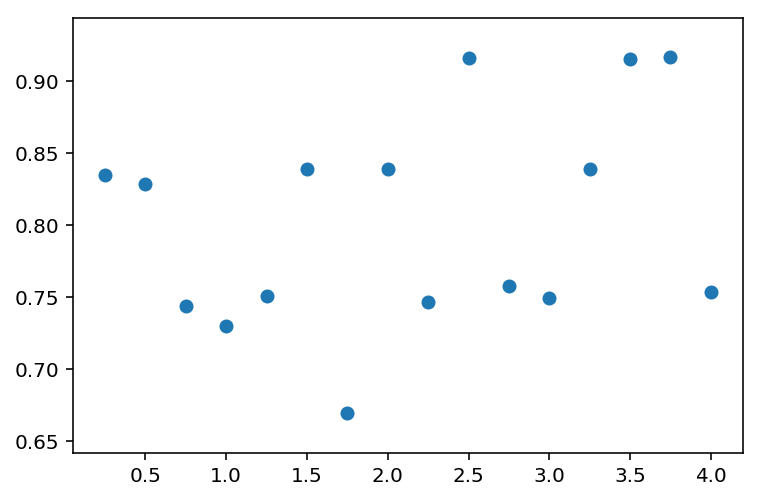

In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

results = np.asarray(results)
plt.scatter(results[:,0], results[:,1])

print("Max accuracy:", np.amax(results[:, 1]))

In [14]:
"""
mnist_loader
~~~~~~~~~~~~
A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e